# Zumi Obstacle Classification using k-NN

## Objective:
Train Zumi to classify two types of obstacles based on distance sensor readings using the k-NN algorithm.

## Setup:
1. Prepare two distinct types of obstacles - a **soft toy** and a **plastic cup**.
1. Charge and setup Zumi on a clear flat surface.
1. Ensure Zumi's Python environment and libraries are ready.

### 1.Data Collection
First, let's import necessary libraries and define a function to collect data.

In [1]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import time
import pickle

zumi = Zumi()
screen = Screen()

# Try loading previous data, if exists. Otherwise, start with an empty list.
# This will store our sensor readings and labels.
try:
    with open('zumi_data.pkl', 'rb') as file:
        data = pickle.load(file)
except FileNotFoundError:
        data = [] # This will store our sensor readings and labels.
        
IR_FRONT_RIGHT = 0
IR_FRONT_LEFT = 5

# Function to collect data.
def collect_data(obstacle_label):
    # Read from front infrared sensors.
    front_left = zumi.get_IR_data(IR_FRONT_LEFT)
    front_right = zumi.get_IR_data(IR_FRONT_RIGHT)
    
    # Create a dictionary for each data point and then append it to the data list
    data_point = {'front_left': front_left, 'front_right': front_right, 'label': obstacle_label}
    data.append(data_point)
    
    return data_point

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
Zumi battery level is low  2 %
Please charge me!


To collect data, manually drive Zumi near each obstacle and execute the cell below.

In [2]:
# Collecting multiple readings for soft toy.
print("Drive Zumi near the soft toy and press Enter...")
for _ in range(20):  # Change this number if you want to collect more or fewer readings.
    input()
    collect_data('soft toy')
    print("Collected data for soft toy. Continue or move to the next position.")
    
# Collecting multiple readings for plastic cup.
print("\nDrive Zumi near the plastic cup and press Enter...")
for _ in range(20):  # Change this number if you want to collect more or fewer readings.
    input()
    collect_data('plastic cup')
    print("Collected data for plastic cup. Continue or move to the next position.")

# Saving the updated data for future use.
with open('zumi_data.pkl', 'wb') as file:
    pickle.dump(data, file)

print("\nData collection complete and saved!")

Drive Zumi near the soft toy and press Enter...

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the next position.

Collected data for soft toy. Continue or move to the n

#### 1. Data Collection - Details
##### Lines 1-4:
* *from zumi.zumi import Zumi*: Imports the Zumi class from the Zumi library provided by Robolink. This class contains functions and methods that allow you to interact with the Zumi robot.
* *from zumi.util.screen import Screen*: This line imports the Screen class from the zumi.util.screen module. It allows us to interact with Zumi's screen (e.g., display messages).
* *import time*: Imports the Python built-in time module, which provides various time-related functions. In this code, we're using it to pause the script execution.
* *import pickle*:This line imports the pickle module. Pickle allows you to serialize and deserialize Python objects. In this code, we use it to save and load the collected data to/from a file.
##### Line 6-7:
* *zumi = Zumi()*: Creates an instance of the Zumi class. This allows you to control the Zumi robot by invoking methods on this zumi object.
* *screen = Screen()*: Creates an instance of the Screen class. This instance (screen) can be used to display text or images on Zumi's screen
##### lines 9-16:
* *Try:*: This block tries to load previously saved data.
* *with open('zumi_data.pkl', 'rb') as file:*: This opens the file zumi_data.pkl in 'read binary' mode.
* *data = pickle.load(file)*: This line deserializes or loads the data from the file into the data list.
* *except*:If the file doesn't exist (i.e., it's the first time running the code), the FileNotFoundError exception is caught, and data is initialized as an empty list
* *data = []*: This *: Initializes an empty list called data.
* Remaining lines define constants that represent the indices of Zumi's front right and left infrared (IR) sensors. These constants are used to specify which sensors to read data from.
list will store the sensor readings (from the infrared sensors) and their associated labels (the type of obstacle Zumi is near).
##### Lines 18-24:
* *def collect_data(obstacle_label):*: Defines a new function named collect_data that takes one argument: obstacle_label. This label represents the type of obstacle Zumi is near when collecting data.
* *front_left = zumi.get_IR_data(IR_FRONT_LEFT)*: Calls the get_IR_data method on the zumi object to get the infrared sensor reading from the front left of Zumi. The reading is stored in the front_left variable.
* *front_right = zumi.get_IR_data(IR_FRONT_RIGHT)*: Similarly, gets the infrared sensor reading from the front right of Zumi and stores it in the front_right variable.
* *data_point = [front_left, front_right, obstacle_label]*: Combines the two infrared readings and the obstacle label into a single list, creating a data point.
* *data_point = {'front_left': front_left, 'front_right': front_right, 'label': obstacle_label}*: A dictionary data_point is created with this sensor data, associating front_left and front_right readings with their respective values, along with the obstacle_label.
* *data.append(data_point)*: Appends the created data point to the previously initialized data list.
* *return data_point*: The function returns the created data point. This is not strictly necessary for the code's purpose but can be useful for verification or debugging.
##### Lines 25 - 40:
* *print("Drive Zumi near the soft toy and press Enter...")*: This line instructs the user (through the notebook's output) to drive Zumi near the specified obstacle.
* *The for _ in range(5)*: loop is set to iterate five times. Each iteration represents a single data collection point.
* *input()*: Pauses the script until the user presses the Enter key. This gives the user time to position Zumi correctly.
* *collect_data('soft toy')*Calls the collect_data function to collect sensor data when Zumi is near the soft toy. The function will store this data with the label 'soft toy'.
* The subsequent three lines repeat this process but for a different obstacle: the plastic cup.
* Opens the file zumi_data.pkl in write-binary mode ('wb') and writes (pickle.dump(data, file)) the current data list to it. This saves all the collected data points to the file for future use.
* Finally, this line prints a message to the screen indicating that the data collection process is complete and that the data has been successfully saved to the file.

### 2. Storing & Visualizing Data
In this section, we aim to present the data we've collected in a structured and easily readable format. Although the initial intention was to use Pandas, a Python library for data manipulation and analysis, we're using basic Python structures to store and visualize our data in a tabular format due to environment limitations.

While this won't provide the full range of functionality that pandas offers, it should be sufficient for simpler tasks.

Instead of a Pandas DataFrame, we used a list of dictionaries. Each dictionary represents a data point where keys are column names and values are the data values.

In [3]:
# Display data in a tabular format
print("\nCollected Data:")

# Print header
print("front_left", "front_right", "label")

# Print data
for row in data:
    print(row['front_left'], row['front_right'], row['label'])
    


Collected Data:
front_left front_right label
227 207 soft toy
227 207 soft toy
227 208 soft toy
226 207 soft toy
227 208 soft toy
234 213 plastic cup
236 213 plastic cup
234 213 plastic cup
234 213 plastic cup
234 213 plastic cup
234 214 soft toy
235 215 soft toy
236 215 soft toy
236 215 soft toy
236 216 soft toy
234 215 soft toy
235 215 soft toy
238 216 soft toy
235 215 soft toy
236 215 soft toy
233 212 soft toy
234 213 soft toy
234 214 soft toy
231 211 soft toy
232 212 soft toy
235 215 soft toy
231 211 soft toy
234 214 soft toy
233 213 soft toy
235 215 soft toy
236 216 plastic cup
237 216 plastic cup
237 216 plastic cup
220 190 plastic cup
219 204 plastic cup
206 185 plastic cup
238 215 plastic cup
237 216 plastic cup
237 217 plastic cup
232 212 plastic cup
237 216 plastic cup
205 168 plastic cup
221 199 plastic cup
237 216 plastic cup
170 110 plastic cup
236 216 plastic cup
237 216 plastic cup
238 215 plastic cup
236 215 plastic cup
216 178 plastic cup


Run the cell above, and you should see a table displaying the data you've collected.



#### 2. Storing & Visualizing Data - Details
##### lines 1-6:
* *print("\nCollected Data:")*: This line prints a header for our output to clearly indicate that the following content will be the collected data.
* *print("front_left", "front_right", "label")*: Prints the column headers for the data. Each header represents a field in our dataset: front_left and front_right for sensor readings, and label for the classification label.
* *for row in data:* : loop iterates through each item in the data list. Each item (row) is a dictionary containing sensor readings and the associated label.
* *print(row['front_left'], row['front_right'], row['label'])*: For each row, this line prints out the values associated with the front_left and front_right sensor readings, along with the obstacle label. The values are displayed in a row of our makeshift table.

When the cell containing this code is run in your Jupyter Notebook, you'll see the data printed out in the output section. Each row of the output corresponds to a single collected data point and is displayed in a format that resembles a simple table.

This way of visualizing data is more manual and less feature-rich compared to using Pandas, but it serves the purpose of allowing us to see the collected data clearly. It also introduces the concept of dataframes and structured data without additional library dependencies.

To progress further in data analysis and manipulation, learning Pandas would be beneficial, but for the scope of this project, this method suffices.

In a notebook, after running the cell, you should see the data you have collected printed out in a format that aligns with the headers front_left, front_right, and label. This visualization is crucial for understanding the distribution and nature of the data collected, which is a fundamental step in data analysis and machine learning.

### 3. Plotting Data
For better visualization, we can plot the data.

Since we're not using Pandas and hence have no groupby functionality, we need to manually group our data based on the labels. The following code achieves this by iterating over the data and collecting points for each label into separate lists. We then plot these lists similarly to how we would plot grouped data from a Pandas DataFrame.

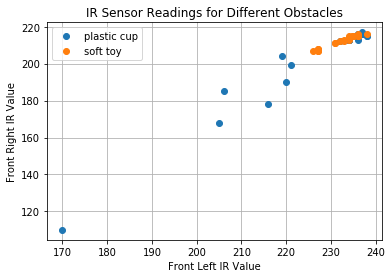

In [5]:
import matplotlib.pyplot as plt

# We will create a dictionary to hold our groups
grouped_data = {}

# Iterate over the data to populate the dictionary
for row in data:
    label = row['label']
    if label not in grouped_data:
        grouped_data[label] = {'front_left': [], 'front_right': []}
    grouped_data[label]['front_left'].append(row['front_left'])
    grouped_data[label]['front_right'].append(row['front_right'])

# Now we have a dictionary with lists of data points for each label

# Plotting
fig, ax = plt.subplots()
for label, group in grouped_data.items():
    ax.plot(group['front_left'], group['front_right'], marker='o', linestyle='', label=label)

ax.legend()

plt.xlabel('Front Left IR Value')
plt.ylabel('Front Right IR Value')
plt.title('IR Sensor Readings for Different Obstacles')
plt.grid(True)
plt.show()

#### 3. Plotting Data - Details
##### Lines 1-11:
* import matplotlib.pyplot which is a widely used plotting library for Python.
* create an empty dictionary grouped_data that will hold our sensor data points, categorized by their labels.
* loop through each row in our list data.
* get the label from the row.
* If the label does not exist in grouped_data, we create a new entry for it, initializing it with empty lists for front_left and front_right.
* Then append the front_left and front_right values from the row to the corresponding lists in grouped_data.
* Once our data is grouped, we create a figure and axes object for plotting (fig, ax = plt.subplots()).
* Iiterate through the grouped_data items, where label is the key (label of the obstacle) and group is the value (dictionary with sensor data lists).
* For each group, we use ax.plot() to plot front_left values against front_right values, with each point represented as a marker 'o' and no line connecting them (linestyle=''). We label each group with its label.
* Call ax.legend() to display a legend that identifies each set of points with their corresponding obstacle labels.
* plt.xlabel(), plt.ylabel(), and plt.title() are used to set the X-axis label, Y-axis label, and plot title respectively.
* plt.grid(True) adds a grid to the plot for better readability.
* Finally, plt.show() displays the plot.

This script will produce a scatter plot where each group of data points is categorized by color and label, allowing for a visual distinction between different types of obstacles based on the IR sensor readings.

By plotting the data, you can visually assess the relationship between the infrared sensor readings and the obstacles' labels. The scatter plot helps to visually determine if a machine learning model, like k-NN, will be effective in differentiating between the obstacle types based on the sensor readings.

### 4. Implementing & Training k-NN
Let's split the data and train our k-NN classifier.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split the data into training and test sets.

X = [[row['front_left'], row['front_right']] for row in data]
y = [row['label'] for row in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k = 3  # For simplicity, we'll start with k=3.
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier.
knn.fit(X_train, y_train)

# Print out classification report
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 plastic cup       1.00      0.89      0.94         9
    soft toy       0.86      1.00      0.92         6

   micro avg       0.93      0.93      0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



#### 4. Implementing & Training k-NN - Details
##### Lines 1-12:
* *from sklearn.model_selection import train_test_split*: This imports the train_test_split function from the scikit-learn (or sklearn) library. This function is used to split datasets into training and testing sets.
* *from sklearn.neighbors import KNeighborsClassifier*: Here, we're importing the KNeighborsClassifier class from the scikit-learn library. This class provides the implementation for the k-Nearest Neighbors (k-NN) algorithm which we intend to use.
* *from sklearn.metrics import classification_report*: A function that generates a report showing the main classification metrics. This will help us evaluate the model's performance.
* create our feature set **X** by using a list comprehension to extract the **front_left** and **front_right** sensor readings from our data. Each feature set is a list of these readings.
* target variable **y** is also created using a list comprehension. It contains all the labels corresponding to each feature set in **X**.

* *X = ...*: The convention in machine learning is to use X to represent the features. So, we store the selected columns in the variable X.
* *y = ...*: Conventionally, y is used to represent the target. Thus, we store the 'label' column in the variable y.
* *train_test_split(X, y, test_size=0.3)*: This function splits the features X and target y into training and testing sets. Here, 70% of the data is used for training, and 30% is used for testing.
    * **X_train** and **y_train** are the features and target for the training set, respectively.
    * **X_test** and **y_test** are the features and target for the testing set, respectively.
* *KNeighborsClassifier(n_neighbors=3)*: This initializes a k-NN classifier with 3 neighbors.
    * *knn = ...*: We're storing this classifier in a variable called knn.
* *knn.fit(X_train, y_train)*: This trains (or "fits") the k-NN model using the training data. The **fit** method adjusts the model based on the given training features (**X_train**) and their corresponding labels (**y_train**).
* After training, we use the **predict** method to classify the data in **X_test**, our unseen test data, and store these predictions in **y_pred**.
* Lastly, use **classification_report** to generate a performance report, comparing the true labels **y_test** with our predicted labels **y_pred**. This report includes metrics such as precision, recall, and f1-score, which provide insight into the model's accuracy.

The process essentially involves setting up the data, initializing a model, and then fitting that model to the training data. Once trained, this model can be used to make predictions on new, unseen data.

### 5. Real-time Classification
Drive Zumi around and when near an obstacle, execute the cell below. Zumi will try to classify it using the trained model.

In [12]:
def classify_obstacle():
    # Read from front infrared sensors.
    front_left = zumi.get_IR_data(IR_FRONT_LEFT)
    front_right = zumi.get_IR_data(IR_FRONT_RIGHT)
    
    prediction = knn.predict([[front_left, front_right]])
    
    # Display the prediction on Zumi's screen
    screen.draw_text("Pred: " + str(prediction[0]))
    
    return prediction[0]

print("Classifying obstacle...")
obstacle_type = classify_obstacle()
obstacle_type

Classifying obstacle...


'soft toy'

#### 5. Real-time Classification - Details
##### Lines 1-11:
* *def classify_obstacle():*: This line defines a new function named classify_obstacle. This function, when called, will fetch the infrared (IR) sensor readings from the Zumi robot, use the k-NN model to predict the obstacle type based on these readings, and return the predicted type.
* *zumi.get_IR_data('front_left')*: This method fetches the reading from the front left infrared (IR) sensor of the Zumi robot.
    * *front_left = ...*: The reading from the front left IR sensor is stored in the variable front_left.
* *zumi.get_IR_data('front_right')*: This method fetches the reading from the front right infrared (IR) sensor of the Zumi robot.
    * front_right = ...: The reading from the front right IR sensor is stored in the variable front_right.
* *knn.predict([[front_left, front_right]])*: The previously trained k-NN model is utilized here to predict the type of obstacle based on the IR readings. The double brackets are used because the predict method expects a 2D array-like structure.
    * *prediction = ...*: The result from the prediction (which is a list) is stored in the prediction variable.
* *return prediction[0]*: This line returns the first (and only) item from the prediction list, effectively passing the predicted obstacle type to wherever the classify_obstacle function was called.
* This line simply prints the message "Classifying obstacle..." to the console, indicating the start of the obstacle classification process.
* *classify_obstacle()*: The classify_obstacle function is called here. This function will fetch the current IR sensor readings, classify the obstacle type using the k-NN model, and return the predicted type.
    * *obstacle_type = ...*: The predicted obstacle type is stored in the obstacle_type variable.
* In the context of a Jupyter notebook, writing a variable's name on its own line like this will display its value in the output cell. Thus, this line will show the predicted obstacle type in the notebook's output.

By reading the Zumi's IR sensors, the robot can then utilize the previously trained k-NN model to predict the type of obstacle it's encountering, showcasing a practical use-case for machine learning in robotics.

### 6. Evaluation
We'll check the accuracy of our classifier using the test set.

In [13]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

#### 6. Evaluation - Details
##### Lines 1-5:
* *from sklearn.metrics import accuracy_score*: This line imports the accuracy_score function from the Scikit-Learn library's metrics module.The accuracy_score function is used to compute the accuracy of classification predictions. It essentially compares the true labels of a dataset to the predicted labels and outputs the fraction of correct predictions.
* *knn.predict(X_test)*: This code makes predictions using the trained k-Nearest Neighbors model (knn). The predict method requires a set of input data to make predictions, in this case, X_test.
    * *X_test*: This is a subset of the data that the model hasn't seen during its training phase. It's used specifically for testing the performance of the model.
    * *y_pred = ...*: The predictions made by the model for each sample in X_test are stored in the y_pred variable. These are essentially the model's best guesses for each test sample based on the training it underwent.

* *accuracy_score(y_test, y_pred)*: This function computes the accuracy of the model's predictions.
    * *y_test*: These are the true labels corresponding to X_test. It's what the model should ideally predict.
    * *y_pred*: As explained above, these are the labels predicted by our model for the test samples.
    * The function compares y_test and y_pred to determine the fraction of correctly predicted labels.
    * *accuracy = ...*: The computed accuracy (a float value between 0 and 1) is stored in this variable. An accuracy of 1.0 indicates that all predictions are correct, while an accuracy of 0.0 indicates that no predictions are correct.
* In the context of a Jupyter notebook, writing a variable's name on its own line like this will display its value in the output cell. Thus, this line will show the computed accuracy in the notebook's output.

This Evaluation section aims to gauge the performance of our trained k-NN model when exposed to new, unseen data. By comparing the predictions y_pred with the actual true labels y_test, we can ascertain how well our model is likely to perform in real-world scenarios where the true labels of input data are unknown ahead of time.

## Conclusion & Discussion
Now that you've completed the experiment, think about:

* The choice of k in k-NN and its impact.
* How to improve the model.
* The importance of diverse and clear data.
